## 1) Interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

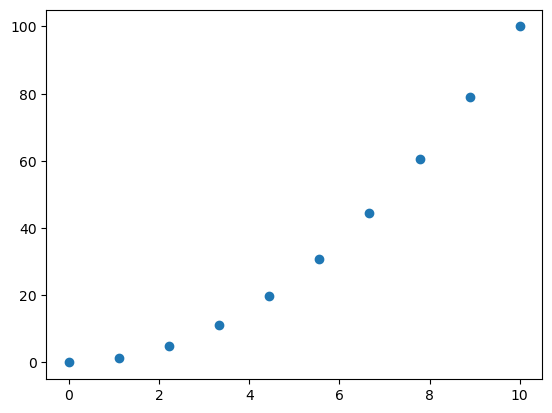

In [2]:
x=np.linspace(0,10,10)
y=x**2
plt.scatter(x,y)
plt.show()

In [3]:
from scipy.interpolate import interp1d

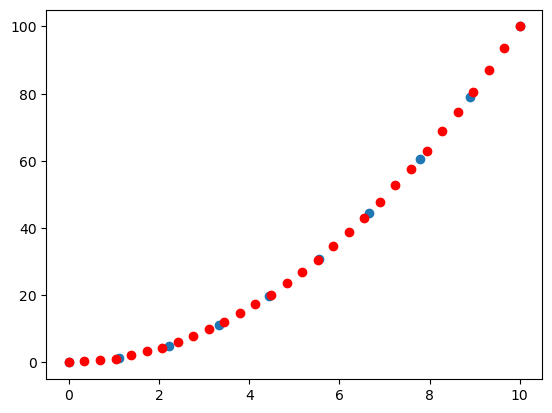

In [4]:
f=interp1d(x,y,kind='linear') # Kind:Pour le type d'interpolation

new_x=np.linspace(0,10,30)
result=f(new_x)

plt.scatter(x,y)
plt.scatter(new_x,result,c='r')
plt.show()

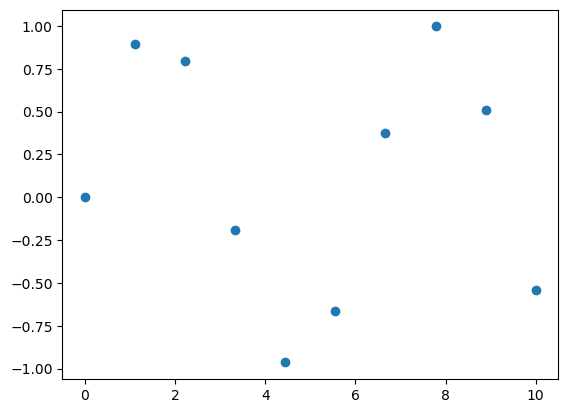

In [5]:
x=np.linspace(0,10,10)
y=np.sin(x)
plt.scatter(x,y)
plt.show()

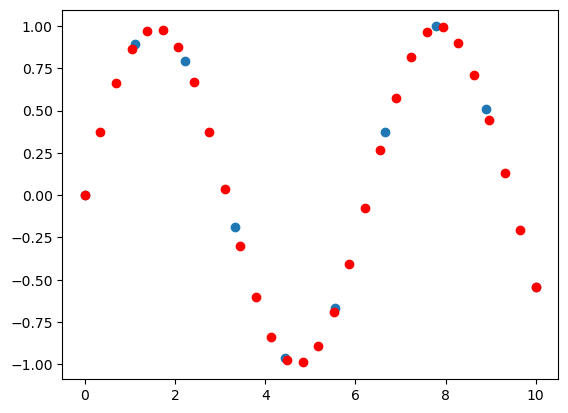

In [6]:
g=interp1d(x,y,kind='cubic')

new_2=np.linspace(0,10,30)
result_2=g(new_2)

plt.scatter(x,y)
plt.scatter(new_2,result_2,c='r')
plt.show()

## 2) Optimisation

### Curve_fit

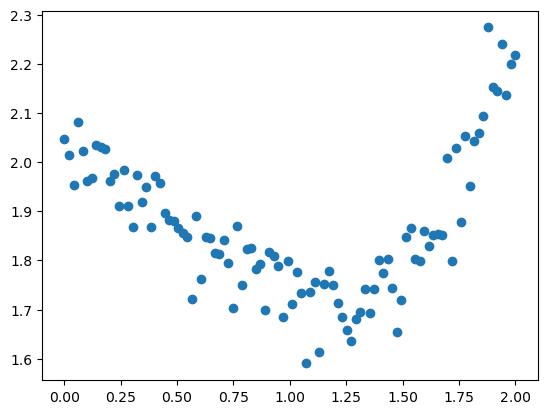

In [7]:
x=np.linspace(0,2,100)
y=1/3*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x,y)

In [8]:
#optimise.curve_fit utilise la methode des moindres carrees pour trouver les bons parametres d'un modele f

#choissons un modele f
def f(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

In [9]:
from scipy import optimize

In [10]:
optimize.curve_fit(f,x,y)

(array([ 0.29608572, -0.47142521, -0.11594663,  2.01833659]),
 array([[ 0.00127942, -0.00383827,  0.00305521, -0.00049637],
        [-0.00383827,  0.01185017, -0.00983637,  0.00171042],
        [ 0.00305521, -0.00983637,  0.00872842, -0.00171916],
        [-0.00049637,  0.00171042, -0.00171916,  0.00046086]]))

In [11]:
# a=0.36440461, b=-0.65539695, c=0.00531402, d=1.99663458 qui sont les differents parametres de notre modele


# array([[ 0.00101255, -0.00303765,  0.00241793, -0.00039283],
#        [-0.00303765,  0.00937836, -0.00778461,  0.00135364],
#        [ 0.00241793, -0.00778461,  0.00690776, -0.00136056],
#        [-0.00039283,  0.00135364, -0.00136056,  0.00036473]]) qui est la matrice de covariancede notre modele

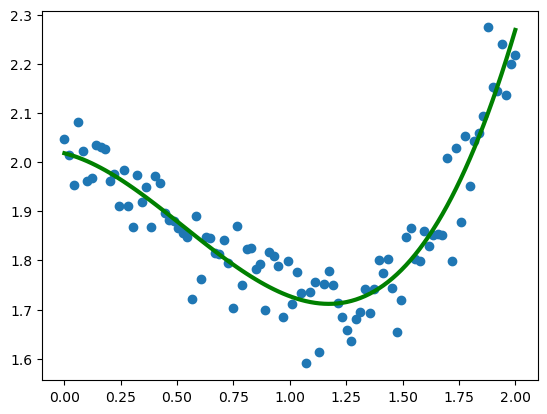

In [12]:
params,params_cov=optimize.curve_fit(f,x,y)
plt.scatter(x,y)
plt.plot(x,f(x,params[0],params[1],params[2],params[3]),c='g',lw=3)

### Minimisation

In [13]:
def f (x):
    return x**2 + 15*np.sin(x)

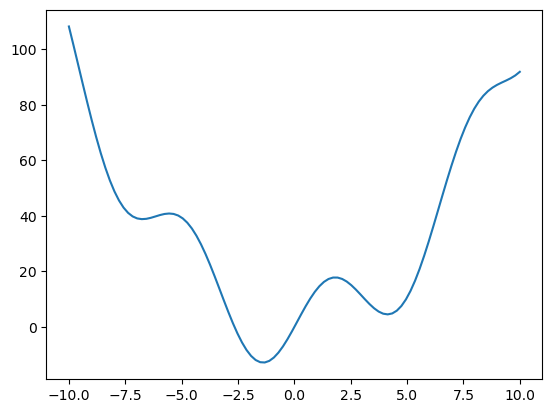

In [14]:
x=np.linspace(-10,10,100)
plt.plot(x,f(x))

In [15]:
optimize.minimize(f,x0=-5)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -12.823616887804414
        x: [-1.385e+00]
      nit: 4
      jac: [ 3.695e-06]
 hess_inv: [[ 5.979e-02]]
     nfev: 18
     njev: 9

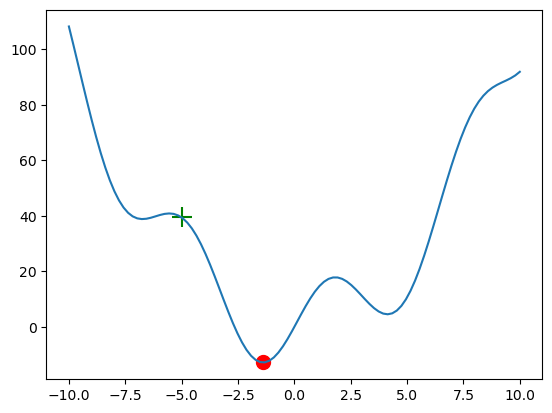

In [16]:
x0=-5
result=optimize.minimize(f,x0=x0).x
plt.plot(x,f(x))
plt.scatter(result,f(result),s=100,c='r',zorder=1)
plt.scatter(x0,f(x0),s=200,marker='+',c='g',zorder=1)
plt.show()

In [17]:
 from sklearn.datasets import load_iris

In [18]:
iris=load_iris()

x=iris.data
y=iris.target
names=list(iris.target_names)

In [19]:
def f(x):
    return np.sin(x[0])+ np.cos(x[0]+x[1])*np.cos(x[0])

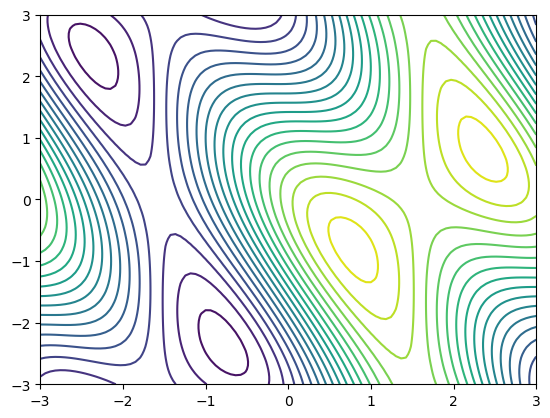

In [20]:
x=np.linspace(-3,3,100)
y=np.linspace(-3,3,100)

x,y=np.meshgrid(x,y)
plt.contour(x,y,f(np.array([x,y])),20)

C:\Users\DONFACK\AppData\Local\Temp\ipykernel_5352\727467136.py:5: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  result=optimize.minimize(f,x0=x0).x


[-0.78539916 -2.35619344]


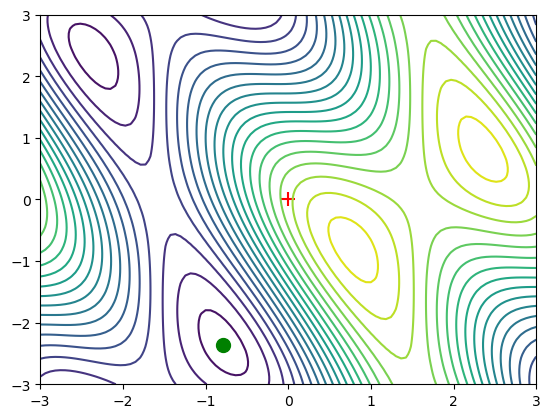

In [21]:
x0=np.zeros((2,1))
plt.contour(x,y,f(np.array([x,y])),20)
plt.scatter(x0[0],x0[1],marker='+',c='r',s=100)

result=optimize.minimize(f,x0=x0).x
plt.scatter(result[0],result[1],c='g',s=100)
print(result)

# 3) Traitement du signal

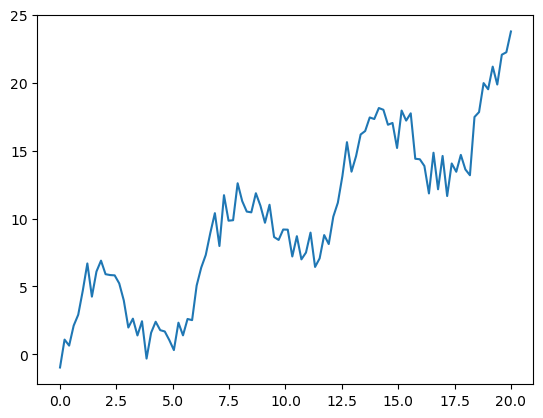

In [22]:
x=np.linspace(0,20,100)
y= x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)
plt.show()

In [23]:
from scipy import signal

In [24]:
new_y=signal.detrend(y) # pour eliminer la tendance lineaire du signal y

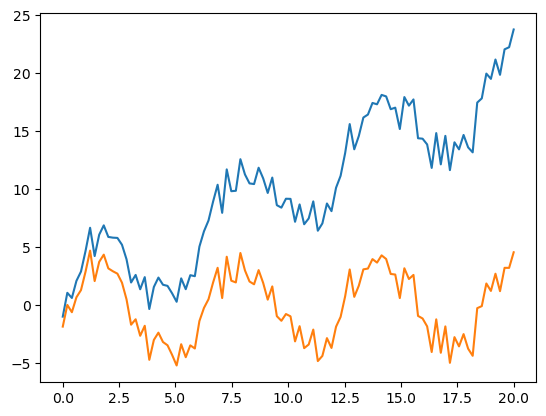

In [25]:
plt.plot(x,y)
plt.plot(x,new_y)
plt.show()

### La transformation de fourier

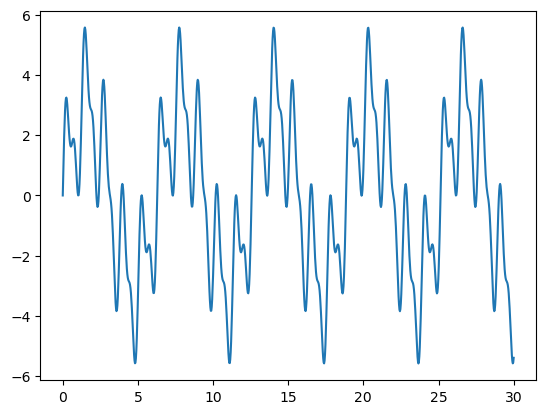

In [26]:
x=np.linspace(0,30,1000)
y=3*np.sin(x)+2*np.sin(5*x)+np.sin(10*x)
plt.plot(x,y)
plt.show()

In [27]:
#Utilisons la transformer de fourier sur ce signal
#Tout d'abord chargons le module fftpack
from scipy import fftpack

C:\Users\DONFACK\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


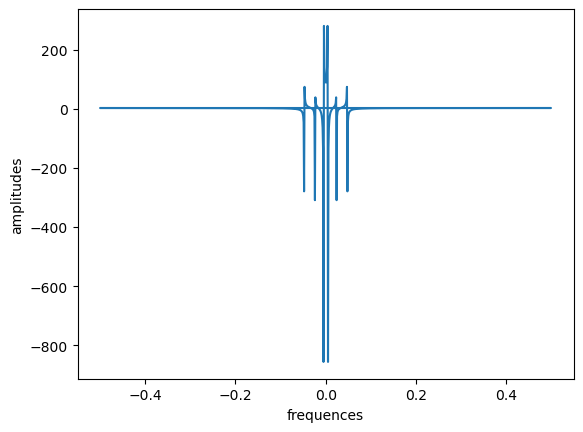

In [28]:
fourier=fftpack.fft(y)
frequence=fftpack.fftfreq(y.size)
plt.plot(frequence,fourier)
plt.xlabel('frequences')
plt.ylabel('amplitudes')
plt.show()

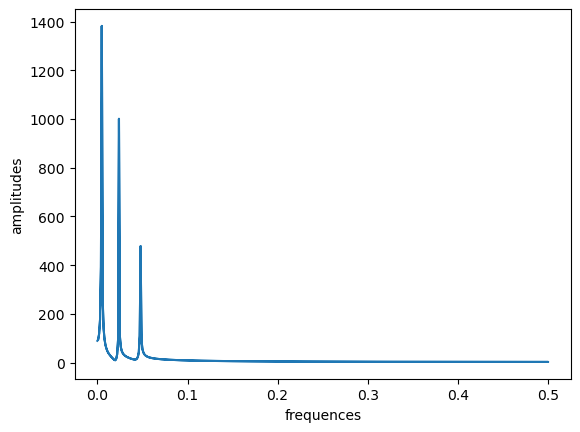

In [29]:
#filtrons ce signal enfin de n'avoir que des frequences et des amplitudes positives
fourier=fftpack.fft(y)
frequence=fftpack.fftfreq(y.size)
plt.plot(np.abs(frequence),np.abs(fourier))
plt.xlabel('frequences')
plt.ylabel('amplitudes')
plt.show()

### Filtrage d'un signal

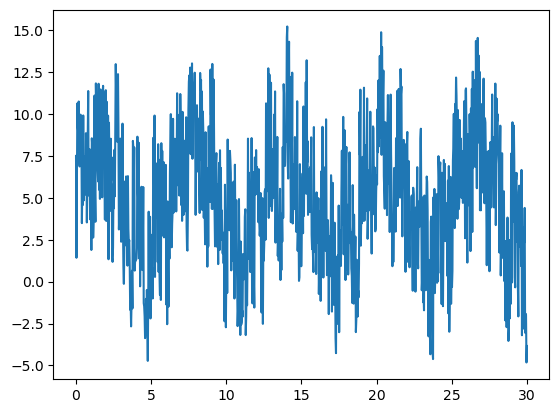

In [30]:
#Nous voulons filtrer le signal ci_dessous
x=np.linspace(0,30,1000)
y=3*np.sin(x)+2*np.sin(5*x)+np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x,y)
plt.show()

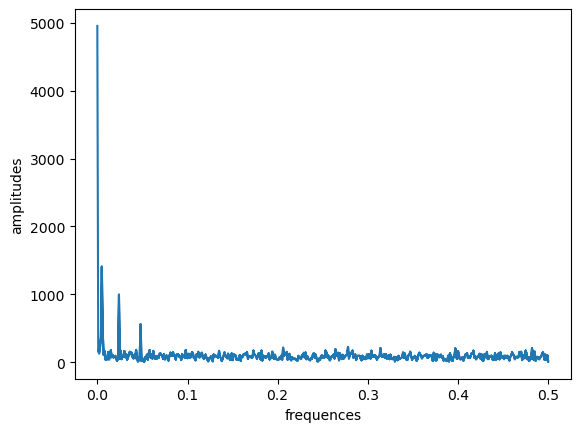

In [31]:
fourier=fftpack.fft(y)
frequence=fftpack.fftfreq(y.size)
plt.plot(np.abs(frequence),np.abs(fourier))
plt.xlabel('frequences')
plt.ylabel('amplitudes')
plt.show()

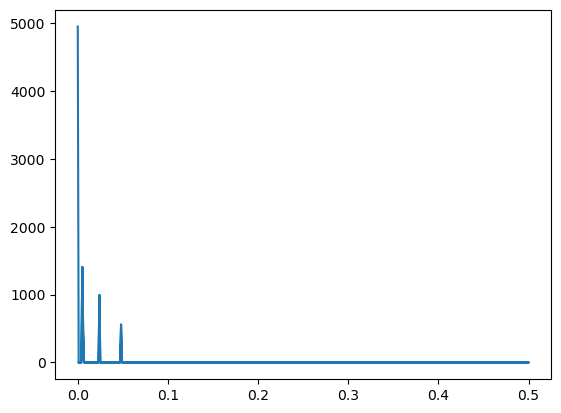

In [32]:
#Nettoyons notre spectre
fourier[np.abs(fourier)<400]=0
plt.plot(np.abs(frequence),np.abs(fourier))
plt.show()

In [33]:
#Appliquons la transformer inverse de laplace
filtered_signal=fftpack.ifft(fourier)

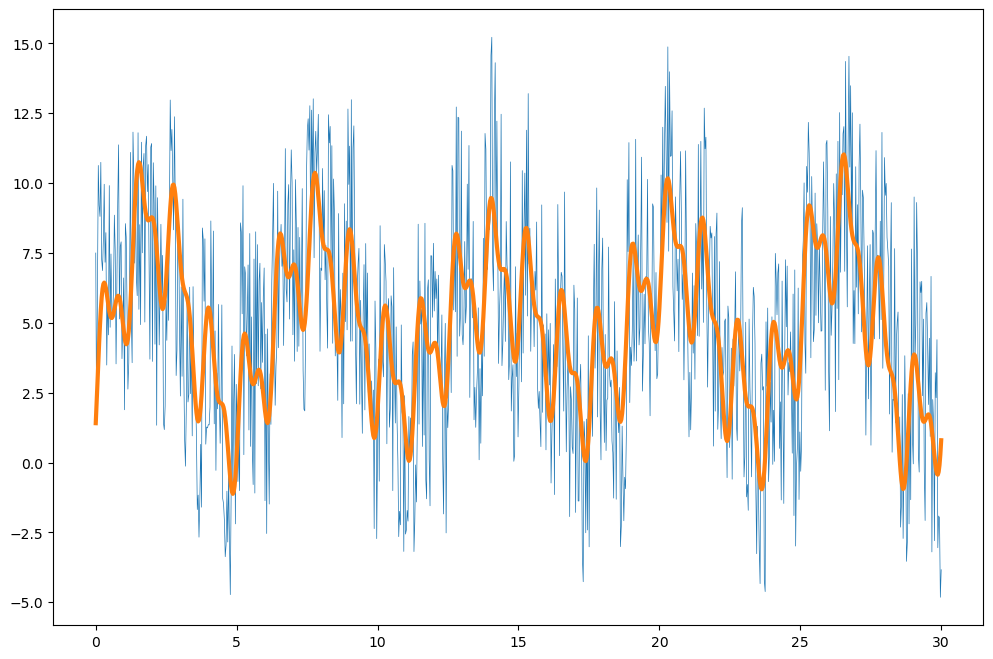

In [34]:
plt.figure(figsize=(12,8))
plt.plot(x,y,lw=0.5)
plt.plot(x,filtered_signal,lw=3)
plt.show()

# 4) Image processing

In [35]:
from scipy import ndimage

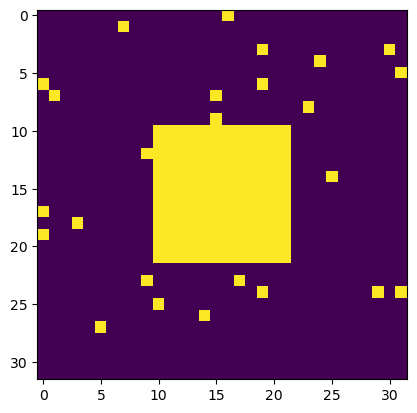

In [36]:
np.random.seed(0)
X=np.zeros((32,32))
X[10:-10,10:-10]=1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)]=1
plt.imshow(X)
plt.show()

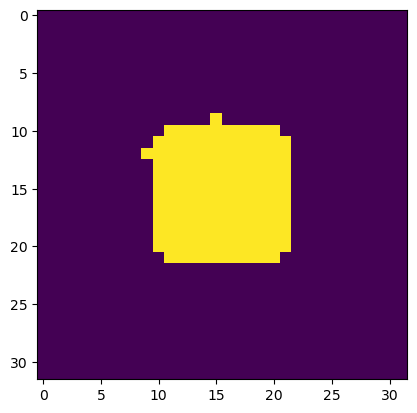

In [37]:
#supprimons les petits arctefacts present sur notre image
open_X=ndimage.binary_opening(X)
plt.imshow(open_X)
plt.show()